In [6]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Cartopy map projections
from matplotlib import cm # Colormap from matplotlib

# You download this by running Xarray Data Structures notebook (changing downloading lines potentially if 
# using something other than urllib)
ds = xr.open_dataset('GLDAS_NOAH025_M_EP.A202010.021.nc4')

## ACCESSING ELEMENTS USING XARRAY
- like Pandas, we'll use some special methods to *access* elements by dimension name and index lookup
   - either labelled ('sel') or 
   - positional integer ('isel')
<br><br>
- very similar to loc and iloc in Pandas 
   - these special methods leverage powerful Pandas indexing tools!

## ACCESSING ELEMENTS: USING LABELLED (EXPLICIT) INDEX: SEL

### (1) Syntax
**basic**:
- da.sel(dim1=label1,dim2=label2,.....)

**slicing**
- da.sel(dim1=**slice**(label1,label2).....)
- element associated with upper bound of index you give (i.e., label2) IS included!

**NOTES**
- common issue + solution:  selecting data that doesn't fall exactly on a coordinate point
  - use the *method* option within sel!
  - you can pick how you want to do this- 'nearest' (neighbor), 'pad', or 'backfill'
  - this option also works with other label-based selection functions (like reindex)
<br><br>
- labels that are actually numerical are read in as numerical data types, but treated as labels!
 - like in Pandas, don't pass in strings of numerical indices

### (2) Examples of accessing elements

In [7]:
# Let's access the albedo in Urbana-Champaign area
# This location does NOT fall on a gridpoint perfectly

                                         # 'nearest neighbor' method
ds['Albedo_inst'].sel(lat=44.2,lon=-88.2,method='nearest')
# You'll see this gives us the data at lat = 44.125, lon=-88.125

<xarray.DataArray 'Albedo_inst' (time: 1)>
array([14.067863], dtype=float32)
Coordinates:
    lat      float32 44.12
    lon      float32 -88.12
  * time     (time) datetime64[ns] 2020-10-01
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Albedo
    cell_methods:   time: mean
    vmin:           4.999999
    vmax:           82.283226

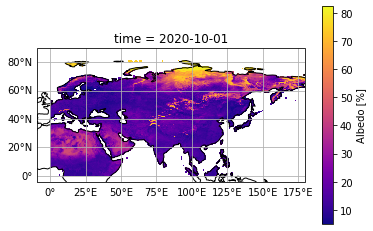

In [8]:
# Time to slice!
# Make sure you go in correct order re: your coordinates

cmap = cm.get_cmap(name='plasma')
p = ds['Albedo_inst'].sel(lat=slice(0,90.0),lon=slice(0,180)).plot(cmap=cmap,subplot_kws=dict(projection=ccrs.PlateCarree())) 
p.axes.coastlines()
gl = p.axes.gridlines(draw_labels=True)
gl.right_labels= False
gl.top_labels=False

## ACCESSING ELEMENTS: USING POSITIONAL (IMPLICIT) INDEX: ISEL


### (1) Syntax
**basic**
- da.isel(dim1=position1,dim2=position2,....)

**slicing**
- da.sel(dim1=**slice**(position1,position2).....)
- element associated with upper bound of index you give (i.e., position2) IS NOT included!

### (2) Examples of accessing elements

In [9]:
ds['Albedo_inst'].isel(lat=440,lon=820) 

<xarray.DataArray 'Albedo_inst' (time: 1)>
array([13.243547], dtype=float32)
Coordinates:
    lat      float32 50.12
    lon      float32 25.12
  * time     (time) datetime64[ns] 2020-10-01
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Albedo
    cell_methods:   time: mean
    vmin:           4.999999
    vmax:           82.283226

## CHANGING THE VALUE OF AN ELEMENT 
- DO NOT USE ISEL OR SEL
<br><br>
- options for changing a value include:
  - xr.where
<br><br>
- *example*: changing the value of albedo in the gridpoint ~ at Urbana-Champaign

In [10]:
# Translation: where lat & lon = give, albedo now = 16, everywhere else, albedo = itself
ds['Albedo_inst'] = xr.where((ds.coords['lat'] == 44.125) & (ds.coords['lon'] == -88.125), 16, ds['Albedo_inst'])